In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument  
from nltk.tokenize import word_tokenize
from tqdm import tqdm
import multiprocessing
from sklearn import utils

In [ ]:
import glob
import nltk
from nltk.tokenize import RegexpTokenizer
from spacy.lang.en import English
from spacy import displacy
import en_core_web_sm
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import string
import numpy as np

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt') #needed to make doc2vec model
data = dict()
filenames=list()
cleaned_text=list()
label=list()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# label_phrases = ['the Revision Applications are dismissed','appeal fails and stands dismissed','Application, therefore, is hereby dismissed','cannot be a ground to entertain subsequent application for grant of anticipatory bail','see no reason to entertain this second application for anticipatory bail','application is concerned, it stands dismissed','petitioner shall continue to be on bail unless the said bail is cancelled','the application is hereby dismissed','The application is, therefore, rejected','The petition, therfore, fails','This application is devoid of material particulars, and, therefore, not maintainable','we have taken the petitions will have to be dismissed and are dismissed','Accordingly, this Application stands rejected','these applications cannot be granted','I do not think that it would be proper to reduce the bail amount','WE, therefore, dispose of this petition','order disposes of the two applications for cancellation of bail','I find no merit in this petition','their remand is valid and legal, and, therefore the applicants are not entitled to bail','this is not a case where the petitioner should be readmitted to bail','this repeated bail application stands dismissed','applicant stands rejected','the bail application made by the accused/petitioner has to be rejected and is accordingly rejected','the objections raised to the detention order are not convincing','Writ Petition, being devoid of substance, stands dismissed','I reject all the above applications','I find there is no merit in this application and consequently the same is hereby dismissed','no case is made out by the petitioner for quashing and setting aside the order of detention','application is required to be and accordingly rejected','the applicant cannot be admitted to bail','applications are, therefore, rejected','directed not to release the convicted accused on bail','application fails and dismissed accordingly','prayer for suspending the operation of this order is rejected','Petition is devoid of merits, hence rule stands discharged','order putting the petitioner in police custody is hereby quashed','Interim relief stands vacated','the appeal is rejected','no case made out for interference in the impugned order of detention of the detenu','petition fails and is hereby dismissed','application for anticipatory bail/ pre-arrest bail order stands rejected','application deserves to be rejected and accordingly same is rejected','application, therefore, stands rejected','present application therefore deserves to be rejected and is hereby rejected','reject this application for anticipatory bail','applicant-accused for bail stands dismissed','application for cancellation of bail is rejected','application is not maintainable and consequently the same is rejected','application is dismissed','Application is dismissed','application is rejected','Application is rejected','application is disposed of accordingly','Application for bail is rejected','application for bail is rejected','Writ Petition is disposed off','applications stand dismissed','bail application is accordingly rejected','Application is accordingly rejected','application is hence rejected','Application rejected','application fails and it is dismissed','petition will stand rejected','appeals are dismissed','applications are hereby dismissed as not maintainable','applications stand rejected','application stands rejected','petition is dismissed','Petition is dismissed','Application is accordingly disposed of','Application dismissed','applications stand adjourned','criminal applications is accordingly rejected','application for anticipatory bail is rejected','In the event of the arrest of the applicants in the territory of this state each of the applicants be released on bail','applicant-accused be released on bail','Accused be released on bail','present appellants be released on bail in the event of their arrest','Criminal Appeal stands allowed','bail is quashed and set aside','The petition is accordingly allowed','satisfied that the accused-applicant deserves granting of bail','Trial Court should lay off the hands from taking any action against these applicants for arresting them','The appeal is allowed','must be quashed and set aside','THE Revision is partly allowed','applications under consideration deserves to succeed','applicant shall be released forthwith on the same bail','Petitions allowed','PRAYER for cancellation of bail made by the prosecution against all other respondents is hereby allowed','we allow this petition','we allow this petition; quash and set aside the impugned detention order','Application for anticipatory bail is allowed','The petitioners be released on bail','Applicant\'s interim bail granted','find the impugned order of detention unsustainable','I find this to be a fit case in which the petitioner deserves to be grant anticipatory bail','APPLICATION allowed','at the commencement of this order that I have granted bail','In the event of the arrest of the Applicants, the Applicants shall be released on bail','petition is hereby allowed','it is a case to protect the applicants/accused by granting pre-arrest bail','this is a fit case for grant of bail to applicant-petitioner','In the event of the arrest of the Applicant, the Applicant shall be released on bail','Applicant shall be released on bail','All these three petitions are allowed','application succeeds','It is directed that the Applicant be released on bail','Applicant be released on bail','Criminal Application for cancellation of bail is allowed','I direct that the applicant be enlarged on bail','applicant/accused shall be released on bail','application is partly allowed','appellant will be relcased on bail','petitioner is directed to be released on bail','Application succeed','petitioner is ordered to be released on bail','bail granted by the Magistrate is also hereby set aside','anticipatory bail granted to the respondents is cancelled','Applicant shall be enlarged on bail','detenus are directed to be released forthwith','Petition is allowed','Prayer for cancellation of bail made by the prosecution against all other respondents is hereby allowed','allow the above application','allow both these applications','detenu shall be set at liberty','accused be enlarged on bail','Petition allowed','petition is allowed','petition partly succeeds','Application allowed','detenu is directed to be released forthwith','detenu be released forthwith','appellants be ordered to be enlarged on bail','application is allowed','detenu be released','Application is allowed','Applications are allowed','application for cancellation of bail is allowed','For the aforesaid reasons, accused be released','Applicants in both the applications shall be released on bail','applications are allowed','applicant is granted bail','Applications filed by the Customs Department/State are accordingly allowed','detention order is unsustainable and the petition succeeds','Applicant is ordered to be released on bail','applicant is ordered to be released on bail','applicant shall be enlarged on bail','bail is granted subject to condition','against the petitioner is quashed and set aside','the applicants are granted bail']

In [ ]:
df = pd.read_csv('/content/drive/My Drive/BE PROJECT/Lawgical Final/LabelledDataset/cleaned_dataset_new.csv') #read cleaned data from drive
# print(df['Judgement'])

In [ ]:
msk = np.random.rand(len(df)) < 0.7 #split dataframe into train and test dataset
train = df[msk]
test = df[~msk]


In [ ]:
#convert the paragraph into TaggedDocument (input for Doc2vec) 
#2 parameters 1. Judgement of case, 2. Label (win or lose)
tagged_data = [TaggedDocument(words=word_tokenize(_d['Judgement'].lower()), tags=[str(_d['label'])]) for i, _d in train.iterrows()]
tagged_data_test = [TaggedDocument(words=word_tokenize(_d['Judgement'].lower()), tags=[str(_d['label'])]) for i, _d in test.iterrows()]


In [ ]:
#how interate in the tagged data
for x in tqdm(tagged_data):
  print(x.words)



 45%|████▍     | 609/1362 [00:00<00:00, 3053.15it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 79%|███████▊  | 1071/1362 [00:00<00:00, 2248.41it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 1362/1362 [00:00<00:00, 2039.06it/s]

['1', 'writ', 'petition', 'art', '226', 'constitution', 'india', 'petitioner', 'challenge', 'order', 'detention', 'record', 'provision', 'national', 'security', 'act', 'short', 'order', 'record', 'gorakhpur', 'per', 'annexure', '8', 'writ', 'petition', 'confirm', 'per', 'annexure', '14', 'writ', 'petition', 'petitioner', 'pray', 'quashing', 'impugned', 'order', 'immediately', 'set', 'liberty', '2', 'impugned', 'order', 'date', 'indicate', 'satisfy', 'necessary', 'detain', 'petitioner', 'provision', 'section', '3', '2', 'prevent', 'act', 'manner', 'prejudicial', 'maintenance', 'supply', 'service', 'essential', 'community', 'ground', 'append', 'detention', 'order', 'also', 'indicate', 'petitioner', 'paper', 'writ', 'petition', 'indicate', 'therein', 'petitioner', 'find', 'cut', 'overhead', 'electric', 'wire', 'arrest', 'cutting', 'wire', 'disrupt', 'supply', 'power', 'detriment', 'public', 'general', 'ground', 'indicate', 'atleast', 'three', 'occasion', 'offence', 'commit', 'applicant', 

In [ ]:
# instantiate a Doc2Vec model with following parameters
max_epochs = 10
vec_size = 10000
alpha = 0.050
train = []
test = []

model = Doc2Vec(vector_size=vec_size, #Dimensionality of the feature vectors.
                alpha=alpha,#Learning rate will linearly drop to min_alpha over all inference epochs. 
                min_alpha=0.00025, # The initial learning rate
                min_count=1,#Ignores all words with total frequency lower than this
              dm =1) #1,0 – Defines the training algorithm. If dm=1, ‘distributed memory’ (PV-DM)
                                                          # If dm=0, 'distributed bag of words'(PV-DBOW) 

#Building a Vocabulary (a training corpus)
model.build_vocab([x for x in tagged_data])


In [ ]:
len(tagged_data)

1362

In [ ]:
# tagged_data  = utils.shuffle(tagged_data)
#train the model
model.train(utils.shuffle([x for x in tagged_data]), total_examples=len(tagged_data), epochs=max_epochs)


In [ ]:
  #fuction to get train and test dataset in target and regressor format
  #infer vector give a vector of the particular case according to the model(whole vocabulary)
  def vec_for_learning(model, tagged_docs):
      sents = tagged_docs
      targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
      return targets, regressors


In [ ]:
# model.save('/content/drive/My Drive/BE PROJECT/Lawgical Final/d2vec.model')

In [ ]:
model =Doc2Vec.load('drive/My Drive/BE PROJECT/Lawgical Final/d2vec.model')#load previously trained model 

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:

y_train, X_train = vec_for_learning(model, tagged_data)
y_test, X_test = vec_for_learning(model, tagged_data_test)

In [ ]:

#print(len(model.wv.vocab.keys()))

45111


In [ ]:
!pip install scikit-plot
from  sklearn.metrics  import accuracy_score
from  sklearn.metrics  import recall_score
from  sklearn.metrics  import precision_score
from sklearn.metrics import confusion_matrix
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

Accuracy Score =  0.7389635316698656
Recall Score =  0.7389635316698656
Precision Score =  0.741033099648137
[[139  64]
 [ 72 246]]


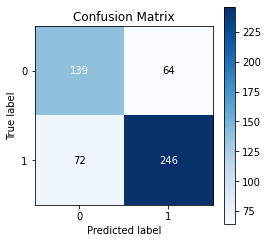

In [ ]:

#algo 1 (LOGISTIC REGRESSION)
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(n_jobs=1, C=1e7) #instantiate the logistic regressor
logreg.fit(X_train, y_train) #train for training dataset
#pickle.dump(logreg, open('d2vlr_model.sav, 'wb'))
predicted = logreg.predict(X_test) #predict value according to the model 

#calculate the following measures for the test dataset and create a confusion matrix
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted,average='weighted'))
print('Precision Score = ',precision_score(y_test,predicted,average='weighted'))
print(confusion_matrix(y_test, predicted))
plot_confusion_matrix(y_test, predicted, figsize=(4,4))



In [ ]:
features=pd.DataFrame({'features': model.wv.vocab.keys(), 'coef_': logreg.coef_[0]})


ValueError: ignored

In [ ]:
# print('Label 0')
# sortedfeatures= features.sort_values(by='coef_')
# print(sortedfeatures[0:10])
# print('Label 1')
# print(sortedfeatures[-10:])

Accuracy Score =  0.6756238003838771
Recall Score =  0.6756238003838771
Precision Score =  0.729019890705038
[[ 42 161]
 [  8 310]]


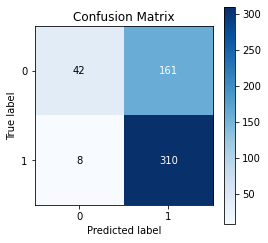

In [ ]:
#algo 2 (KNN)-optimized
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')#n_neighbours defines closeness of a cluster
knn.fit(X_train, y_train)
predicted = knn.predict(X_test)
# pickle.dump(knn, open('d2vknn_model.sav', 'wb'))
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted,average='weighted'))
print('Precision Score = ',precision_score(y_test,predicted,average='weighted'))
print(confusion_matrix(y_test, predicted))
plot_confusion_matrix(y_test, predicted, figsize=(4,4))

Accuracy Score =  0.7523992322456814
Recall Score =  0.7523992322456814
Precision Score =  0.7552478393982025
[[144  59]
 [ 70 248]]


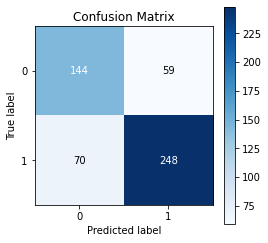

In [ ]:
#algo 3 (SVM)
from sklearn.svm import LinearSVC
svm = LinearSVC(class_weight='balanced', max_iter=30000, penalty='l1',dual=False)
svm.fit(X_train, y_train)
predicted = svm.predict(X_test)
# pickle.dump(svm, open('d2vsvm_model.sav', 'wb'))
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted,average='weighted'))
print('Precision Score = ',precision_score(y_test,predicted,average='weighted'))
print(confusion_matrix(y_test, predicted))
plot_confusion_matrix(y_test, predicted, figsize=(4,4))

Accuracy Score =  0.7984644913627639
Recall Score =  0.7984644913627639
Precision Score =  0.8212054237407121
[[109  94]
 [ 11 307]]


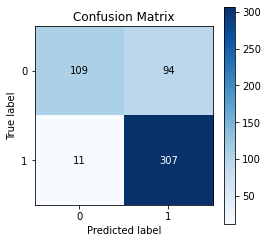

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rfclf=RandomForestClassifier(random_state=52, bootstrap=False, max_features='auto', n_estimators=2000, class_weight='balanced')
rfclf.fit(X_train, y_train)
predicted=rfclf.predict(X_test)
# pickle.dump(rfclf, open('d2vrf_model.sav', 'wb'))
print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted,average='weighted'))
print('Precision Score = ',precision_score(y_test,predicted,average='weighted'))
print(confusion_matrix(y_test, predicted))
plot_confusion_matrix(y_test, predicted, figsize=(4,4))

In [ ]:
# #scaling inputvectors using maxabsscaler
# from sklearn import preprocessing
# max_abs_scaler = preprocessing.MaxAbsScaler()
# X_train_mabs= max_abs_scaler.fit_transform(X_train)
# X_test_mabs= max_abs_scaler.transform(X_test)